In [11]:
#importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [12]:
#storing data and labels in the list
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [13]:
print(cur_path)

C:\Users\User\Documents\traffic sign


In [ ]:
#preprocess the images(resized to 30 * 30)
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [15]:
#converting the list into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [16]:
#Load data & Labels
#data=np.load('./training/data.npy')
#labels=np.load('./training/target.npy')
#print(data.shape, labels.shape)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [18]:
#Convert labels to onehot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [19]:
#build the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 61ms/step - accuracy: 0.3458 - loss: 3.2051 - val_accuracy: 0.9267 - val_loss: 0.3161
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.8254 - loss: 0.6061 - val_accuracy: 0.9406 - val_loss: 0.2189
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 65s 66ms/step - accuracy: 0.8887 - loss: 0.3899 - val_accuracy: 0.9691 - val_loss: 0.1169
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 75s 76ms/step - accuracy: 0.9034 - loss: 0.3548 - val_accuracy: 0.9654 - val_loss: 0.1246
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 64s 65ms/step - accuracy: 0.9237 - loss: 0.2693 - val_accuracy: 0.9763 - val_loss: 0.0887
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.9284 - loss: 0.2520 - val_accuracy: 0.9796 - val_loss: 0.0759
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.9351 - loss: 0.2507 - val_accuracy: 0.9790 - val_loss: 0.0748
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 58s 59ms/step - accuracy: 0.9374 - loss: 0.2352 - 

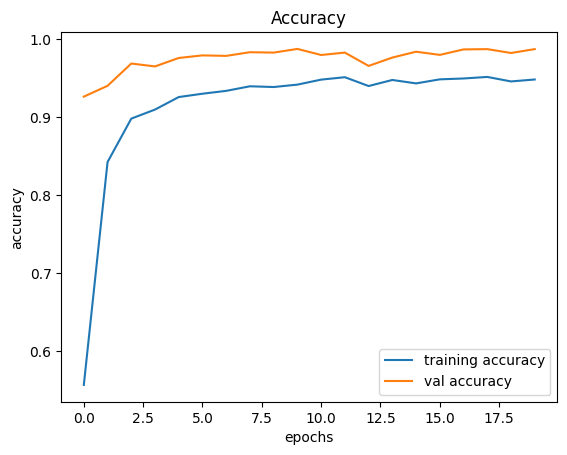

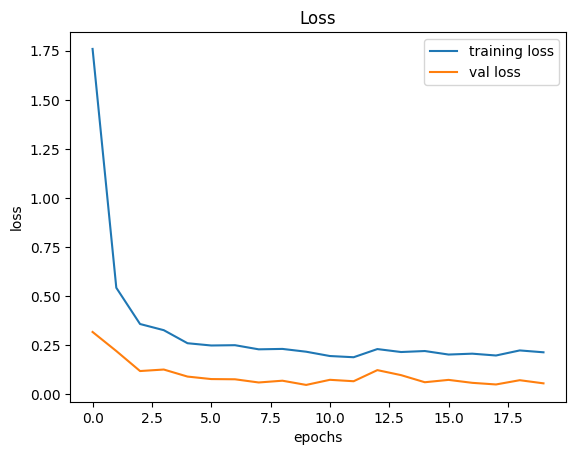

In [21]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
#testing on Test data
def testing(testcsv):
    y_test = pd.read_csv('Test (1).csv')
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [23]:
X_test, label = testing('Test (1).csv')
#Y_pred = model.predict_classes(X_test)
Y_pred = np.argmax(model.predict(X_test), axis=-1)
Y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [24]:
#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9601741884402217


In [25]:
#save the model
model.save("./training/TSR.h5")

In [26]:
#load the model
import os
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [27]:
#43 classes
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    #Y_pred = model.predict_classes(X_test)
    return image,Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
Predicted traffic sign is:  Speed limit (100km/h)


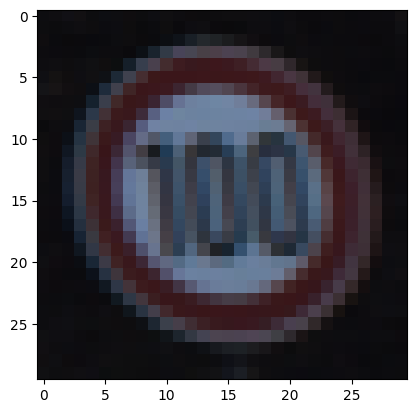

In [34]:
plot, prediction = test_on_img(r'D:\traffic sign\Test\02042.png')

s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted traffic sign is:  Road work


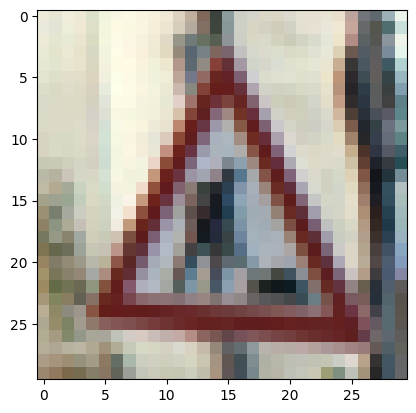

In [35]:
plot, prediction = test_on_img(r'D:\traffic sign\Test\04303.png')

s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()